In [172]:
# 모듈 로딩 -----------------------------
import tensorflow as tf
from tensorflow.keras import Sequential, Input           # 모델 객체
from tensorflow.keras.layers import Dense, Dropout       # 레이어 객체
from tensorflow.keras.datasets.boston_housing import load_data
import numpy as np

### [1] 데이터 로딩
---

In [173]:
# 학습용, 테스트용 = 8 : 2
(x_train, y_train), (x_test, y_test) = load_data()

In [174]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [175]:
x_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]),
 15.2)

### [1-1] 전처리
---
- 특성(Feature) 전처리
    * 수치 데이터 : 값의 범위
    * 문자 데이터 : 수치화 

In [176]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [177]:
scaler=StandardScaler()

In [178]:
scaler.fit(x_train)

StandardScaler()

In [179]:
scaler.mean_, scaler.scale_

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [180]:
x_train_scaled = scaler.transform(x_train)

### [2] NN Model 실습
---
- (1) 모델 구상
- (2) 모델 생성
- (3) 학습
- (4) 평가
- (5) 테스트

#### [2-1] 모델 구상
- 입력 데이터 => 13 특성
- 출력 데이터 => 1 집값

In [181]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model = Sequential(name='BostonNNM')

In [182]:
# Layer 추가 하기
model.add( Input(shape=(13,), name='input') )
model.add( Dense(30, activation='relu', name='hidden-1') )
# model.add( Dense(30, activation='relu', name='hidden-1', input_shape(13,)) )

# 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 node를 비활성화 (랜덤)
model.add( Dropout(0.5) )
model.add( Dense(10, activation='relu', name='hidden-2') )
# 회귀 => 출력층
model.add( Dense(1, activation='linear', name='output') )

In [183]:
# 모델 구성 확인 => summary()
model.summary()

Model: "BostonNNM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 30)                420       
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 hidden-2 (Dense)            (None, 10)                310       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


#### [2-2] 모델 생성
---
- Sequential 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정
    * 오차 계산 함수 설정 => loss
    * W, B 최적화 방식 설정 => optimizer
    * 모델의 성능 측정 항목 설정 => metrics
- 파라미터 값들
    * str 타입으로 입력 가능
    * 객체 타입으로 입력 가능

In [184]:
model.compile(loss='mse', optimizer='adam', metrics='mae')

#### [2-3] 학습
---
- fit() 메서드
    * 파라미터
    * 반환값 => History 객체

In [185]:
from tensorflow.keras.callbacks import EarlyStopping

# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
stopCB = EarlyStopping(monitor='val_loss', patience=3)

In [186]:
result = model.fit(x_train,
                   y_train,
                   epochs=1000,
                   batch_size=10,
                   validation_data=(x_test, y_test),
                   callbacks=[stopCB])

Epoch 1/1000
41/41 [==============================] - 1s 8ms/step - loss: 14843.2393 - mae: 93.5258 - val_loss: 347.1703 - val_mae: 14.6861
Epoch 2/1000
41/41 [==============================] - 0s 3ms/step - loss: 6582.2822 - mae: 62.8726 - val_loss: 484.9789 - val_mae: 18.5287
Epoch 3/1000
41/41 [==============================] - 0s 3ms/step - loss: 3649.8184 - mae: 46.4550 - val_loss: 499.4302 - val_mae: 18.1238
Epoch 4/1000
41/41 [==============================] - 0s 3ms/step - loss: 2620.1104 - mae: 39.9937 - val_loss: 265.4509 - val_mae: 13.2005
Epoch 5/1000
41/41 [==============================] - 0s 3ms/step - loss: 1803.9648 - mae: 32.8721 - val_loss: 248.3635 - val_mae: 12.5073
Epoch 6/1000
41/41 [==============================] - 0s 3ms/step - loss: 1498.7078 - mae: 29.2361 - val_loss: 236.4114 - val_mae: 12.2928
Epoch 7/1000
41/41 [==============================] - 0s 3ms/step - loss: 1348.3959 - mae: 28.5264 - val_loss: 238.1547 - val_mae: 12.3550
Epoch 8/1000
41/41 [======

In [187]:
# 학습 후 학습 결과 체크 => History 객체
type(result)

keras.callbacks.History

In [188]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [189]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [190]:
# result.history['loss'], result.history['mae']

In [191]:
### 시각화 ----------------------------------------

In [192]:
import matplotlib.pyplot as plt

In [193]:
# result.epoch

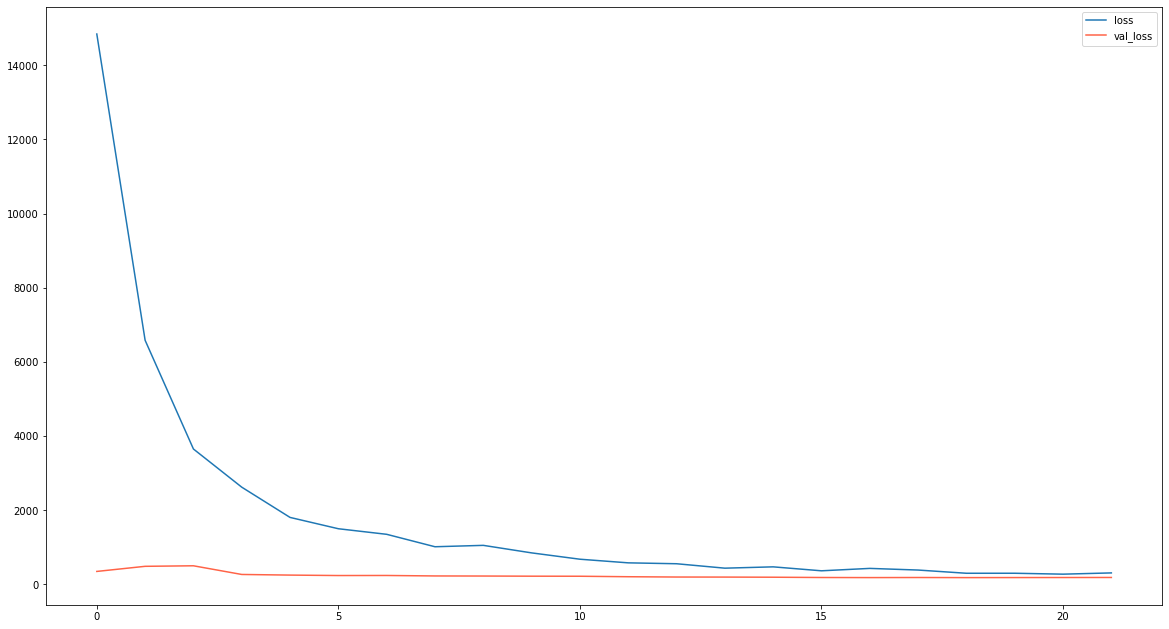

In [194]:
plt.figure(figsize=(20,11))
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], color='tomato', label='val_loss')
plt.legend()
plt.show()

#### [2-4] 평가
---
- evaluate() 메서드
    * 파라미터 : test_data, test_target
    * 반환값 : loss, compile()의 metrics에서 설정한 항목값

In [195]:
eRet = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 184.2464 - mae: 10.7824


In [196]:
eRet  # 낮을수록 좋음

[184.24636840820312, 10.782401084899902]

#### [2-5] 예측
---
- predict()

In [197]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 83ms/step


array([[14.47551]], dtype=float32)

In [199]:
model1 = Sequential([Dense(10, activation='relu', input_shape=(3,)),
                    Dense(5, activation='relu'),
                    Dense(1, activation='sigmoid')])

In [ ]:
model1 = Sequential()
model1.add(Dense(10, activation='relu', input_shape=(3,)))
model1.add(Dense(10, activation='relu'))

In [200]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
